In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-unicorns-2022/Unicorntable_india.csv


In [3]:
# Read the CSV file in pandas
unicorn_df = pd.read_csv("/kaggle/input/indian-unicorns-2022/Unicorntable_india.csv")

In [4]:
unicorn_df.head()

,No.,Company,Sector,Publicly Listed,Entry Valuation($B),Valuation ($B),Entry,Formar Unicorn,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,0,1.0,1.0,11-Sep,0,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart,E-Commerce,1,1.0,37.6,12-Feb,0,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,0,1.0,1.5,13-Feb,0,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal,E-Commerce,0,1.8,2.4,14-Oct,1,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM,Fintech - Payments & Wallet,1,1.7,16.0,15-Feb,0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [5]:
unicorn_df.info()
# Checking For Null Values 
unicorn_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  102 non-null    int64  
 1   Company              102 non-null    object 
 2   Sector               102 non-null    object 
 3   Publicly Listed      102 non-null    int64  
 4   Entry Valuation($B)  102 non-null    float64
 5   Valuation ($B)       102 non-null    float64
 6   Entry                102 non-null    object 
 7   Formar Unicorn       102 non-null    int64  
 8   Location             102 non-null    object 
 9   Select Investors     102 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 8.1+ KB


No.                    0
Company                0
Sector                 0
Publicly Listed        0
Entry Valuation($B)    0
Valuation ($B)         0
Entry                  0
Formar Unicorn         0
Location               0
Select Investors       0
dtype: int64

In [6]:
# Bar Graph of all companies vs Valuation sorted alphabeticaly
df_1 = unicorn_df.loc[:, ['Company','Valuation ($B)', 'Entry Valuation($B)']].sort_values(by='Company')

fig = px.bar(df_1, x='Company', y='Valuation ($B)',height=700,width=2800, color='Entry Valuation($B)',title='Company v/s Valuation', labels={'Company':'Companies',
                                                                                                                     'Valuation ($B)':'Current Valuation ($B)',
                                                                                                                     'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout( title_text='Company v/s Valuation',template='plotly_white')
fig.show()

In [7]:
#To 15 Companies based on Current Valuation
fig = px.bar(unicorn_df.loc[:, ['Company','Valuation ($B)','Entry Valuation($B)']].sort_values('Valuation ($B)', ascending=False)[:15],
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='To 15 Companies based on Current Valuation',template='plotly_dark')
fig.show()

In [8]:
#To 15 Companies based on Entry Valuation
fig = px.bar(unicorn_df.loc[:, ['Company','Valuation ($B)','Entry Valuation($B)']].sort_values('Entry Valuation($B)', ascending=False)[:15],
             x='Company', 
             y='Entry Valuation($B)', 
             height=500,
             width=700, 
             color='Valuation ($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='To 15 Companies based on Entry Valuation',template='plotly_dark')
fig.show()

In [9]:
#To 15 Companies with High Growth
high_growth_df = unicorn_df.loc[:, ['Company','Valuation ($B)','Entry Valuation($B)']].sort_values('Entry Valuation($B)', ascending=False)
high_growth_df['growth'] = high_growth_df['Valuation ($B)'] - high_growth_df['Entry Valuation($B)']

fig = px.bar(high_growth_df.sort_values('growth', ascending=False)[:15],
             x='Company', 
             y='growth', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'growth':'Growth',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Top 15 Companies with High Growth',template='plotly_white')
fig.show()

In [10]:
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("E-Commerce")]

In [11]:
# Bar graph Sector v/s No of Companies (using plotly)
sector = unicorn_df.loc[:,['Sector']]
df = pd.DataFrame({'Sector':unicorn_df['Sector'].value_counts().index,
                  'No of Companies':unicorn_df['Sector'].value_counts().values
                  })

fig = px.bar(df, 
             x='Sector', 
             y='No of Companies',
             color='No of Companies',
             height=800,
             width=1800, 
             title='Sector v/s No of Companies'
            )
fig.show()

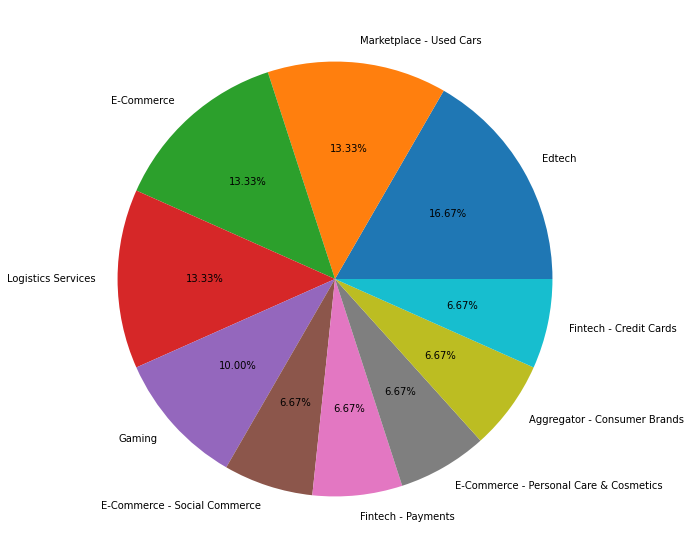

In [12]:
# Pie chart for Sector v/s No of Companies using matplotlib
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10))
plt.pie(unicorn_df['Sector'].value_counts().values[:10],
       labels=unicorn_df['Sector'].value_counts().index[:10],
       autopct='%1.2f%%')
plt.show()

In [13]:

# Pie chart for Sector v/s No of Companies
sector = unicorn_df.loc[:,['Sector']]
df = pd.DataFrame({'Sector':unicorn_df['Sector'].value_counts().index,
                  'No of Companies':unicorn_df['Sector'].value_counts().values
                  })
fig = px.pie(df, 
             values='No of Companies', 
             names='Sector', 
             title='Sector v/s No of Companies', 
             hole=.2, 
             height=900,
             width=1200)
fig.show()

In [14]:
# Find the top level Unicorn Sectors 
sector_lst = unicorn_df['Sector'].unique().tolist()

sec = set()
for sector in sector_lst:
    sec1 = sector.split(" - ")
    if sec1[0] != 'B2B E-Commerce':
        sec.add(sec1[0])

top_lvl_sectors = list(sec)
print(top_lvl_sectors)

['Web3 Infrastructure', 'Logistics Services', 'Social Media', 'Adtech', 'Foodtech', 'D2C', 'Edtech', 'SaaS', 'Mobility', 'Conversational Messaging', 'Content', 'Healthtech', 'Interior Design', 'Aggregator', 'Marketplace', 'Gaming', 'Proptech', 'E-Commerce', 'Fintech', 'IT Services', 'Cryptocurrency Exchange', 'NBFC']


In [15]:
# Companines in Ecommerce Sector ( consider Ecommerce and marketplace in ecommerce sector)
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("E-Commerce") | unicorn_df['Sector'].str.contains("Marketplace") ]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Ecommerce Sector',template='plotly_white')
fig.show()

In [16]:
# Companines in Saas Sector
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("SaaS")]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Saas Sector',template='plotly_white')
fig.show()

In [17]:
# Companines in Fintech Sector
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("Fintech")]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Fintech Sector',template='plotly_white')
fig.show()

In [18]:

# Companines in Edtech Sector
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("Edtech")]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Edtech Sector',template='plotly_white')
fig.show()

In [19]:

# Companines in Logistics Services Sector
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("Logistics Services")]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Logistics Services Sector',template='plotly_white')
fig.show()

In [20]:

# Companines in Gaming Sector
ecom_df = unicorn_df.loc[unicorn_df['Sector'].str.contains("Gaming")]
fig = px.bar(ecom_df.sort_values('Valuation ($B)', ascending=False),
             x='Company', 
             y='Valuation ($B)', 
             height=500,
             width=700, 
             color='Entry Valuation($B)',
             labels={'Company':'Companies',
                    'Valuation ($B)':'Current Valuation ($B)',
                    'Entry Valuation($B)':'Entry Valuation($B)'})
fig.update_layout(title_text='Companines in Gaming Sector',template='plotly_white')
fig.show()

In [21]:
# Type of styles available in matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


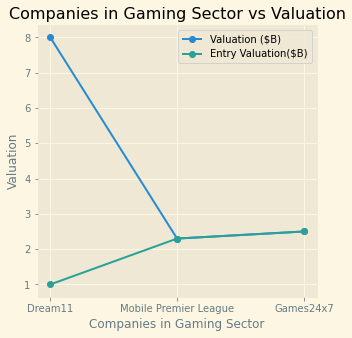

In [22]:
style.use('Solarize_Light2')
plt.figure(figsize=(5,5))
plt.plot(ecom_df['Company'],ecom_df['Valuation ($B)'], label='Valuation ($B)', marker = 'o'  )
plt.plot(ecom_df['Company'],ecom_df['Entry Valuation($B)'], label='Entry Valuation($B)', marker = 'o' )
plt.legend()
plt.xlabel('Companies in Gaming Sector')
plt.ylabel('Valuation')
plt.title('Companies in Gaming Sector vs Valuation')
plt.show()

In [23]:
fig = px.line(ecom_df, x="Company", y="Valuation ($B)", title="Company vs Current Valuation ($B) in Gaming Sector") 
fig1 = px.line(ecom_df, x="Company", y="Entry Valuation($B)", title="Company vs Entry Valuation($B) in Gaming Sector")

fig.show()
fig1.show()

